<a href="https://colab.research.google.com/github/toaruman/hatamei/blob/main/new_project1_Kazuki_Ikenoue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

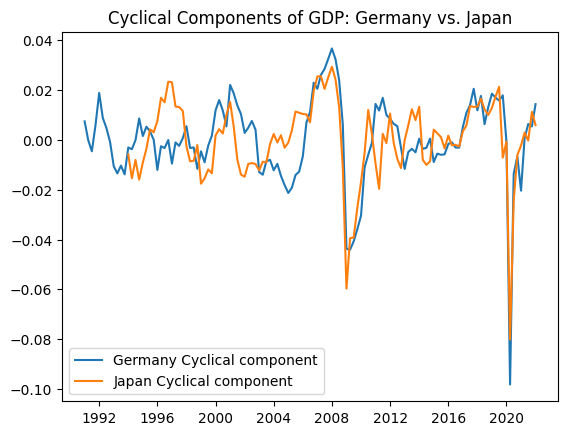

Germany Cycle mean: -1.6007106751203536e-13
Germany Cycle standard deviation: 0.016855544919836336
Japan Cycle mean: 1.9173649885101642e-13
Japan Cycle standard deviation: 0.016100214545195696
Germany GDP standard deviation: NGDPRSAXDCDEQ    0.117859
dtype: float64
Japan GDP standard deviation: JPNRGDPEXP    0.060395
dtype: float64
Correlation coefficient between Germany and Japan GDP cycles: 0.7201718836587743


In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# Download Germany GDP data from FRED using pandas_datareader
gdp_germany = web.DataReader('NGDPRSAXDCDEQ', 'fred', start_date, end_date)
log_gdp_germany = np.log(gdp_germany)

# Apply a Hodrick-Prescott filter to the data to extract the cyclical component for Germany
cycle_germany, trend_germany = sm.tsa.filters.hpfilter(log_gdp_germany, lamb=1600)

# Download Japan GDP data from FRED using pandas_datareader
gdp_japan = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_japan = np.log(gdp_japan)

# Apply a Hodrick-Prescott filter to the data to extract the cyclical component for Japan
cycle_japan, trend_japan = sm.tsa.filters.hpfilter(log_gdp_japan, lamb=1600)

# Plot the cycle component for Germany
plt.plot(cycle_germany, label="Germany Cyclical component")

# Plot the cycle component for Japan
plt.plot(cycle_japan, label="Japan Cyclical component")

# Add a legend and show the plot
plt.legend()
plt.title("Cyclical Components of GDP: Germany vs. Japan")
plt.show()

# Calculate the mean and standard deviation of the cycle component for Germany
cycle_mean_germany = cycle_germany.mean()
cycle_std_germany = cycle_germany.std()

print("Germany Cycle mean:", cycle_mean_germany)
print("Germany Cycle standard deviation:", cycle_std_germany)

# Calculate the mean and standard deviation of the cycle component for Japan
cycle_mean_japan = cycle_japan.mean()
cycle_std_japan = cycle_japan.std()

print("Japan Cycle mean:", cycle_mean_japan)
print("Japan Cycle standard deviation:", cycle_std_japan)

# Calculate the standard deviation of Germany and Japan GDP
std_germany = log_gdp_germany.std()
std_japan = log_gdp_japan.std()

print("Germany GDP standard deviation:", std_germany)
print("Japan GDP standard deviation:", std_japan)

# Calculate the correlation coefficient between Germany and Japan GDP cycles
correlation = cycle_germany.corr(cycle_japan)

print("Correlation coefficient between Germany and Japan GDP cycles:", correlation)
